In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/workspaces/Data-Analyst-Project-Portfolio/Netflix-WatchPattern-Analytics/data/netflix_cleaned.csv")

In [4]:
df['Date'] = pd.to_datetime(df['Watch_Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df['DateOnly'] = df['Date'].dt.date

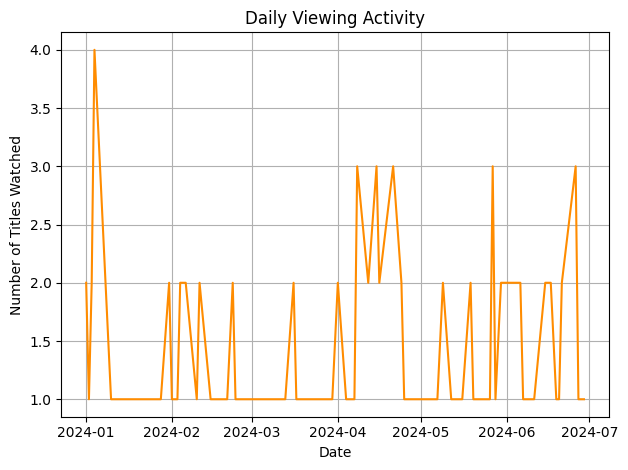

In [5]:
daily_views = df.groupby('DateOnly').size()

daily_views.plot(kind='line', linewidth=1.5, color='darkorange')
plt.title("Daily Viewing Activity")
plt.xlabel("Date")
plt.ylabel("Number of Titles Watched")
plt.tight_layout()
plt.grid(True)
plt.show()

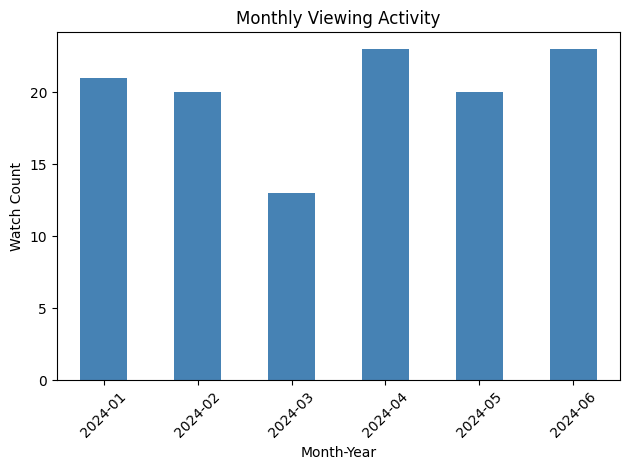

In [6]:
df['MonthYear'] = df['Date'].dt.to_period('M').astype(str)
monthly_views = df.groupby('MonthYear').size()

monthly_views.plot(kind='bar', color='steelblue')
plt.title("Monthly Viewing Activity")
plt.xlabel("Month-Year")
plt.ylabel("Watch Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_10589/4077970881.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_views.index, y=hourly_views.values, palette="coolwarm")


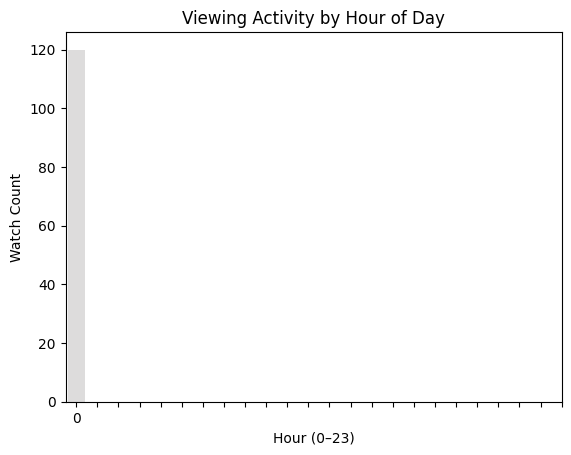

In [9]:
if 'Start Time' in df.columns:
    df['Hour'] = pd.to_datetime(df['Start_Time'], errors='coerce').dt.hour
elif 'Date' in df.columns:
    df['Hour'] = pd.to_datetime(df['Date'], errors='coerce').dt.hour

hourly_views = df['Hour'].value_counts().sort_index()

sns.barplot(x=hourly_views.index, y=hourly_views.values, palette="coolwarm")
plt.title("Viewing Activity by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Watch Count")
plt.xticks(range(0, 24))
plt.show()